In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing (e.g. pd.read_csv)
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### The procedure for developing a machine learning project

1. formation of the problem [формування задачі]
2. receiving data [отримання даних]
3. EDA [вивчення даних]
4. data preparation [підготовка даних]
5. model selection and training [вибір і тренування моделі]
6. model improvements [покращення моделі]

### 1. Analyze the dataset and train the model.
Зробіть аналіз датасету та натренуйте модель.

### 2. Download the Titanic dataset, namely train.csv and test.csv.
Завантажте датасет Titanic, а саме - train.csv та test.csv.

In [200]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [202]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
print('Training data shape:', train_data.shape)
print('Testing data shape:', test_data.shape)

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [204]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [206]:
train_data.isnull().values.any()

True

In [207]:
train_data.duplicated().sum()

0

In [208]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [209]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. EDA_Study the data. Make a visualization that you think is necessary. Construct a correlation matrix.
Вивчіть дані. Зробіть візуалізацію, яку вважаєте необхідною. Побудувати кореляційну матрицю.

In [210]:
# The number of people who survived by the indicator "Sex"

train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

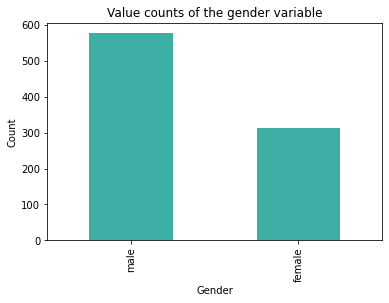

In [211]:
train_data.Sex.value_counts().plot(kind = 'bar',color='#3caea3')
plt.title('Value counts of the gender variable')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [212]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print('% of men who survived:', rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [213]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


 - The first 5 rows

In [214]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
# how many people are in different classes?
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- Ticket class_pclass: A proxy for socio-economic status (SES)

In [216]:
# First variant to %
print('-------------------------------------------------------------')
print('Ticket class_pclass: A proxy for socio-economic status (SES)')
print('1st = Upper, 2nd = Middle, 3rd = Lower')
print('-------------------------------------------------------------')

cs1 = train_data.loc[train_data.Pclass == 1 ]['Survived']
rate_cs1 = sum(cs1)/len(cs1)
print("% of 1st class who survived:", rate_cs1)

cs2 = train_data.loc[train_data.Pclass == 2 ]['Survived']
rate_cs2 = sum(cs2)/len(cs2)
print("% of 2nd class who survived:", rate_cs2)

cs3 = train_data.loc[train_data.Pclass == 3 ]['Survived']
rate_cs3 = sum(cs3)/len(cs3)
print("% of 3rd class who survived:", rate_cs3)


-------------------------------------------------------------
Ticket class_pclass: A proxy for socio-economic status (SES)
1st = Upper, 2nd = Middle, 3rd = Lower
-------------------------------------------------------------
% of 1st class who survived: 0.6296296296296297
% of 2nd class who survived: 0.47282608695652173
% of 3rd class who survived: 0.24236252545824846


In [217]:
# Second variant to %
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- sibsp: The dataset defines family relations in this way

In [218]:
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- parch: The dataset defines family relations in this way

In [219]:
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

train_data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


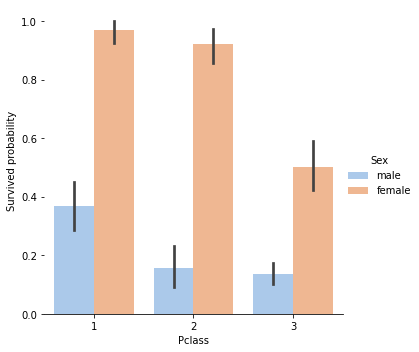

In [220]:
q = sns.catplot(x ='Pclass', y='Survived', hue='Sex', data=train_data, kind='bar', palette='pastel')
q.despine(left=True)
q = q.set_ylabels('Survived probability')

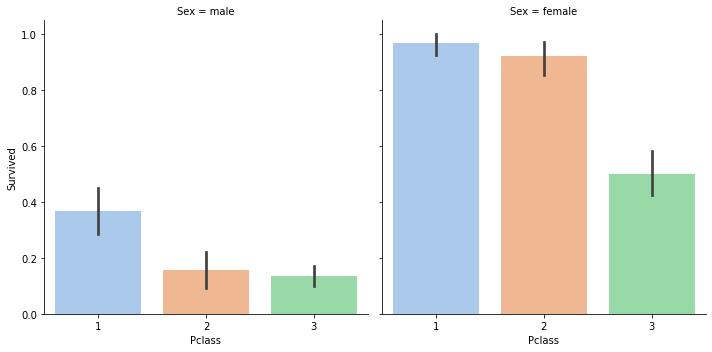

In [228]:
q = sns.catplot(data=train_data, x ='Pclass', y='Survived', col='Sex', kind='bar', palette='pastel')


### Correlation Matrix

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


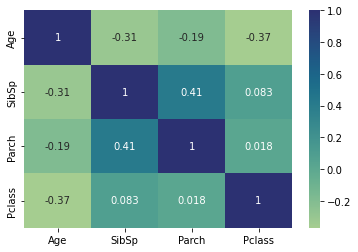

In [229]:
# Correlation Matrix_1

sns.heatmap(train_data[["Age","SibSp","Parch","Pclass", 'Sex']].corr(), cmap="crest", annot=True)
print(train_data.corr())

<AxesSubplot:>

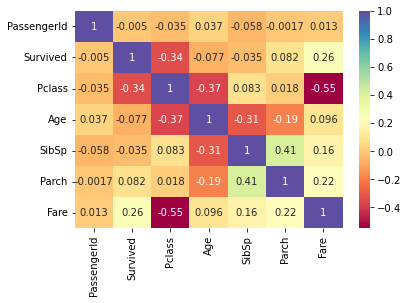

In [235]:
# Correlation Matrix_2
sns.heatmap(train_data.corr(), cmap='Spectral', annot=True)

<AxesSubplot:>

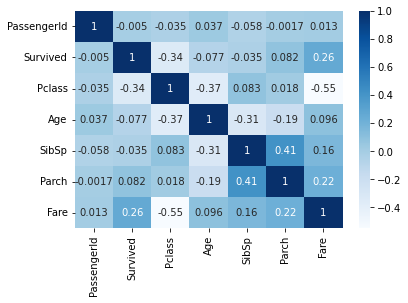

In [232]:
# Correlation Matrix_3
sns.heatmap(train_data.corr(), cmap="Blues", annot=True)

In [237]:
train_data.Fare.max()

512.3292

In [32]:
train_data.Fare.min()

0.0

### 4. Perform a data cleanup as needed. Identify the set of traits that you think most influence human survival.
Зробіть очищення даних, за потреби. Визначіть набір ознак, які на вашу думку найбільше впливають на виживання людини.

In [33]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [34]:
# some data is  NULL

print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

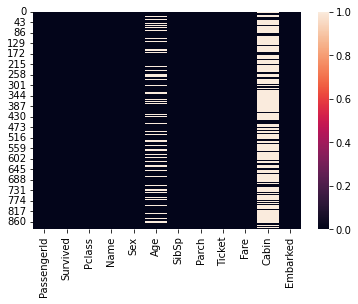

In [238]:
sns.heatmap(train_data.isna())

In [35]:
train_data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [36]:
isnull = sum((train_data.Age.isnull())/len(train_data.Age))*100
print("% of NULL:", isnull)
print('% of another:', 100- isnull)

% of NULL: 19.86531986531981
% of another: 80.1346801346802


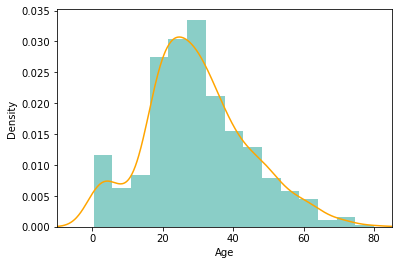

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [38]:
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='#3caea3', alpha=0.6)
train_data["Age"].plot(kind='density', color='orange')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# mean age
print('The mean of "Age" is %.2f' %(train_data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_data["Age"].median(skipna=True)))

<AxesSubplot:ylabel='Frequency'>

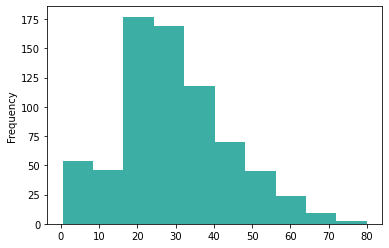

In [239]:
# 2nd variant
train_data['Age'].plot.hist(color='#3caea3')

- FILL in the 'Age' column using the average value(mean)

In [242]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [243]:
# Check before 177 after 0
train_data['Age'].isnull().sum()

0

<AxesSubplot:>

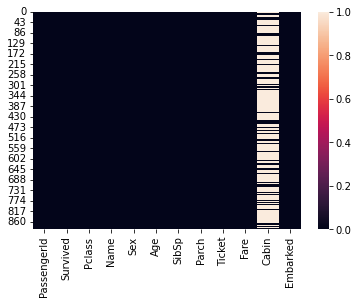

In [244]:
sns.heatmap(train_data.isna())

In [248]:
train_data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [249]:
# add the new column 'cabin' with one letter
train_data['cabin'] = train_data.Cabin.apply(lambda x: str(x)[0])
print(train_data.cabin.value_counts())
pd.pivot_table(train_data, index='Survived', columns='cabin', values ='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64


cabin,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


- Create fictitious data using get_dummies or convert column 'Sex' to numerical values

In [253]:
# drop
gender = pd.get_dummies(train_data['Sex'], drop_first=True)
train_data['Gender']=gender
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,1


- Drop the columns which aren`t required

In [47]:
train_data.drop(['Name','Sex','Ticket', 'Embarked','Cabin','cabin'], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### 5. Train a linear regression on train.csv on these features. For classification using linear regression
Натренуйте на цих ознаках лінійну регресію на train.csv. Для класифікації за допомогою лінійної регресії

#### 5.1 Analyze the output of the model, namely, calculate the metrics of the classification task for test.csv.
Проаналізуйте результат моделі, а саме, порахуйте метрики задачі класифікації для test.csv. 

#### 5.2 Compare with metrics for train.csv
Порівняйте з метриками для train.csv

**The following metrics are of interest:**
- Accuracy
- Precision
- Recall
- F1 Score
- ROC
- AUC
- Confusion Matrix

In [254]:
# Linear Regression
# Separate Dependent and Independent variables

x = train_data[['PassengerId', 'Pclass', 'Age','SibSp', 'Parch','Fare','Gender']]
y = train_data['Survived']       
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred

array([ 0.12055222,  0.11718974,  0.06035291,  0.95834209,  0.61230118,
        0.44773752,  0.94190808,  0.97535125,  0.45014453,  0.63329841,
        0.09150217,  0.73080642,  0.11959025,  0.91355468,  1.01796468,
        0.73417848,  0.16152053,  0.29483148,  0.08418046,  0.28659166,
        0.35500101,  1.05400104,  0.11659066,  0.44806799,  0.68218829,
        0.87305056,  0.10349773,  0.68312374,  0.81285233,  0.63860021,
        0.09869238,  0.66634521,  0.13091845,  0.4508518 ,  0.07348307,
        0.43153405,  0.03217191,  0.28787245,  0.30880691,  0.12841203,
        0.21036954,  0.14641936,  0.12034649,  0.0181236 ,  0.90044633,
        0.12013346,  0.11727747,  0.99597388,  0.21994205,  0.26257207,
        0.44527664,  0.48871161,  0.89580439,  0.18509471,  0.44465537,
        0.24011127,  0.24315823,  0.53491538,  0.07254477,  0.02722808,
        0.16856418,  0.58390555,  0.77752544,  0.44872137,  0.62462983,
        0.10153424,  0.83674852,  0.28195821,  0.91064537,  1.02

In [255]:
# Logistic Regression

lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_train, y_train)
pred2 = lr2.predict(x_test)
pred2

# https://scikit-learn.org/stable/modules/preprocessing.html

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [256]:
# We said that linear regression model basically finds 
# the best value for the intercept and slope, which results in a line that best fits the data. 

print(lr.intercept_)

1.2997497769638076


In [257]:
# And the then execute the following script to retrieving the slope (coefficient of x):
print(lr.coef_)

[-5.14592656e-06 -1.60095907e-01 -6.29529546e-03 -4.87998299e-02
 -1.44815039e-02  3.72762359e-04 -5.14782245e-01]


- **Metrics - MAE, MSE, RMSE**

In [52]:
print('*(MAE) Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('*(MSE) Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('*(RMSE) Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

*(MAE) Mean Absolute Error: 0.2886378277300262
*(MSE) Mean Squared Error: 0.13695668415631487
*(RMSE) Root Mean Squared Error: 0.3700765922836986


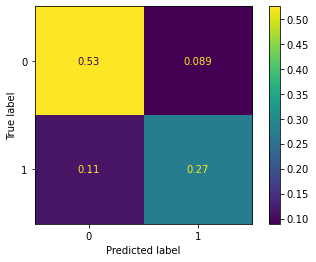

In [259]:
7. 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# https://pythonguides.com/scikit-learn-confusion-matrix/
cm = metrics.confusion_matrix(y_test, pred2, labels=lr2.classes_, normalize='all')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=lr2.classes_)
disp.plot()
plt.show()

# True Positives, False Positives and False Negatives

In [260]:
# Build a text report showing the main classification metrics.

print(metrics.classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



- *The precision* is intuitively the ability of the classifier not to label
a negative sample as positive. 
- *The recall* is intuitively the ability of the classifier to find all the positive samples.
- *The F-beta* score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
  The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
- *The support* is the number of samples of the true response that lie in that class.

+ *Micro-averaged:* all samples equally contribute to the final averaged metric
+ *Macro-averaged:* all classes equally contribute to the final averaged metric
+ *Weighted-averaged:* each classes’s contribution to the average is weighted by its size


In [263]:
1. # accuracy_score
'''
If normalize == True, return the fraction of correctly classified samples (float),
else returns the number of correctly classified samples (int).
''' 

ac_n=metrics.accuracy_score(y_test, pred2) # with normalize
print(ac_n)

0.7988826815642458


In [264]:
ac_wn=metrics.accuracy_score(y_test, pred2, normalize=False) # without normalize
print(ac_wn)

143


In [265]:
2. # precision_score
ps=metrics.precision_score(y_test, pred2)
ps1=metrics.precision_score(y_test, pred2, average=None, zero_division=1)
ps2=metrics.precision_score(y_test, pred2, average='macro')
ps3=metrics.precision_score(y_test, pred2, average='micro')
ps4=metrics.precision_score(y_test, pred2, average='weighted')
print(ps,ps1,ps2,ps3,ps4)

0.7538461538461538 [0.8245614  0.75384615] 0.7892037786774628 0.7988826815642458 0.7973024525215057


In [266]:
3. # recall_score
rs=metrics.recall_score(y_test, pred2)
rs1=metrics.recall_score(y_test, pred2, average=None)
rs2=metrics.recall_score(y_test, pred2, average='macro')
rs3=metrics.recall_score(y_test, pred2, average='micro')
rs4=metrics.recall_score(y_test, pred2, average='weighted')
print(rs,rs1,rs2,rs3,rs4)

0.7101449275362319 [0.85454545 0.71014493] 0.7823451910408432 0.7988826815642458 0.7988826815642458


In [267]:
4. # f1_score

f=metrics.f1_score(y_test, pred2)
f1=metrics.f1_score(y_test, pred2, average=None)
f2=metrics.f1_score(y_test, pred2, average='macro')
f3=metrics.f1_score(y_test, pred2, average='micro')
f4=metrics.f1_score(y_test, pred2, average='weighted')
f5=metrics.f1_score(y_test, pred2, average='binary')
print(f,f1,f2,f3,f4,f5)


0.7313432835820897 [0.83928571 0.73134328] 0.785314498933902 0.7988826815642458 0.7976766208859931 0.7313432835820897


In [268]:
5. #roc_curve_Receiver operating characteristic (ROC)
# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
roc=metrics.roc_curve(y_test, pred2)
fpr, tpr, thresholds=metrics.roc_curve(y_test, pred2)
print(roc)
print(thresholds)
print(tpr)
print(fpr)

(array([0.        , 0.14545455, 1.        ]), array([0.        , 0.71014493, 1.        ]), array([2, 1, 0]))
[2 1 0]
[0.         0.71014493 1.        ]
[0.         0.14545455 1.        ]


In [269]:
6. # auc_Compute Area Under the Curve (AUC) using the trapezoidal rule.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc
auc=metrics.auc(fpr, tpr)
print(auc)

0.7823451910408431


In [271]:
# create a data table 
df = pd.DataFrame({ 'metrics': ['avg', 'none_avg', 'macro', 'micro','weighted'],
                   '1.Accuracy' : ['{:.2f}'.format(metrics.accuracy_score(y_test, pred2)),
                                  metrics.accuracy_score(y_test, pred2, normalize=False),
                                 0,
                                  0,
                                  0],
                   '2.Precision' : [ '{:.2f}'.format(metrics.precision_score(y_test, pred2)),
                                   format(metrics.precision_score(y_test, pred2, average=None)),
                                   '{:.2f}'.format(metrics.precision_score(y_test, pred2, average='macro')),
                                   '{:.2f}'.format(metrics.precision_score(y_test, pred2, average='micro')),
                                   '{:.2f}'.format(metrics.precision_score(y_test, pred2, average='weighted'))
                                          ],                    
                     '3.Recall': [ '{:.2f}'.format(metrics.recall_score(y_test, pred2)),
                               format(metrics.recall_score(y_test, pred2, average=None)),
                               '{:.2f}'.format(metrics.recall_score(y_test, pred2, average='macro')),
                              '{:.2f}'.format(metrics.recall_score(y_test, pred2, average='micro')),
                               '{:.2f}'.format(metrics.recall_score(y_test, pred2, average='weighted'))
                               ],
                     '4.F1': ['{:.2f}'.format(metrics.f1_score(y_test, pred2)),
                           format(metrics.f1_score(y_test, pred2, average=None)),
                           '{:.2f}'.format(metrics.f1_score(y_test, pred2, average='macro')),
                           '{:.2f}'.format(metrics.f1_score(y_test, pred2, average='micro')),
                           '{:.2f}'.format(metrics.f1_score(y_test, pred2, average='weighted'))
                               ],
                     '5.ROC': [('fpr',fpr),
                             ('tpr', tpr),
                             ('thresholds',thresholds),
                             0,
                             0],
                     '6.AUC': ['{:.2f}'.format((metrics.auc(fpr, tpr))),
                            '{:.2f}'.format(auc),
                            0,
                            0,
                            0],
                   '7.CM': [ metrics.confusion_matrix(y_test, pred2),
                          cm,
                          0,
                          0,
                          0]
                   
                  })
print(df)

    metrics 1.Accuracy              2.Precision                 3.Recall  \
0       avg       0.80                     0.75                     0.71   
1  none_avg        143  [0.8245614  0.75384615]  [0.85454545 0.71014493]   
2     macro          0                     0.79                     0.78   
3     micro          0                     0.80                     0.80   
4  weighted          0                     0.80                     0.80   

                      4.F1                                   5.ROC 6.AUC  \
0                     0.73  (fpr, [0.0, 0.14545454545454545, 1.0])  0.78   
1  [0.83928571 0.73134328]   (tpr, [0.0, 0.7101449275362319, 1.0])  0.78   
2                     0.79                 (thresholds, [2, 1, 0])     0   
3                     0.80                                       0     0   
4                     0.80                                       0     0   

                                                7.CM  
0                              

#### 5.2 COMPARE METRIX train.csv & test.csv ?

### 6. Improve your performance by training logistic regression.
Покращіть результат, натренувавши логістичну регресію.